# Task 1

Goal: The idea of this script was the first approximation to INMET data and generate some scripts that would be reused in other stages of the project. This project served mainly to map the evolution of the group with a short series of data.

Data: For this task, daily data (2023-02-10) from 4 meteorological stations, 2 in the city of São Paulo and two in Porto Alegre.

**Import of libraries**

In [23]:
#pip install geobr rtree
#pip install folium
#pip install plotly
#pip install nbformat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import folium
import geopandas as gpd
import geobr
import rtree

**Import tables**

The CSV files were imported from the INMET website and inserted into the project. 

Some of the abbreviations used:

* BN = Belem Novo
* JB = Jardim Botanico
* POA = Porto Alegre 
* SP = São Paulo

In [24]:
poa_JB = pd.read_csv("dataDay/POA_D10_JB.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null'])
poa_BN = pd.read_csv("dataDay/POA_D10_BN.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null'])
sp_mirante = pd.read_csv("dataDay/MIRANTE-A701.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null'])
sp_interlagos = pd.read_csv("dataDay/INTERLAGOS-A771.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null'])

sp_interlagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  24 non-null     object 
 1   Hora (UTC)            24 non-null     int64  
 2   Temp. Ins. (C)        24 non-null     float64
 3   Temp. Max. (C)        24 non-null     float64
 4   Temp. Min. (C)        24 non-null     float64
 5   Umi. Ins. (%)         24 non-null     float64
 6   Umi. Max. (%)         24 non-null     float64
 7   Umi. Min. (%)         24 non-null     float64
 8   Pto Orvalho Ins. (C)  24 non-null     float64
 9   Pto Orvalho Max. (C)  24 non-null     float64
 10  Pto Orvalho Min. (C)  24 non-null     float64
 11  Pressao Ins. (hPa)    24 non-null     float64
 12  Pressao Max. (hPa)    24 non-null     float64
 13  Pressao Min. (hPa)    24 non-null     float64
 14  Vel. Vento (m/s)      24 non-null     float64
 15  Dir. Vento (m/s)      24 

**Column modification "Hora (UTC)"**

In [25]:
hora = poa_JB["Hora (UTC)"]

hora_modif = []
for i in hora:
    hora_str = str(i)
    if len(hora_str) == 1 and hora_str == '0':
        hora_modif.append(str(hora_str))
    elif len(hora_str) > 1 and len(hora_str) < 4:
        for j in hora_str:
            if j != '0':
                hora_modif.append(j)
    elif len(hora_str) == 4:
        hora_str = list(hora_str)
        for j in range(4,2,-1):
            hora_str.pop()
        hora_str = hora_str[0]+hora_str[1]
        hora_modif.append(hora_str)

print(hora_modif)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


## Graphics

Simple graph of the Max Temperature of São Paulo

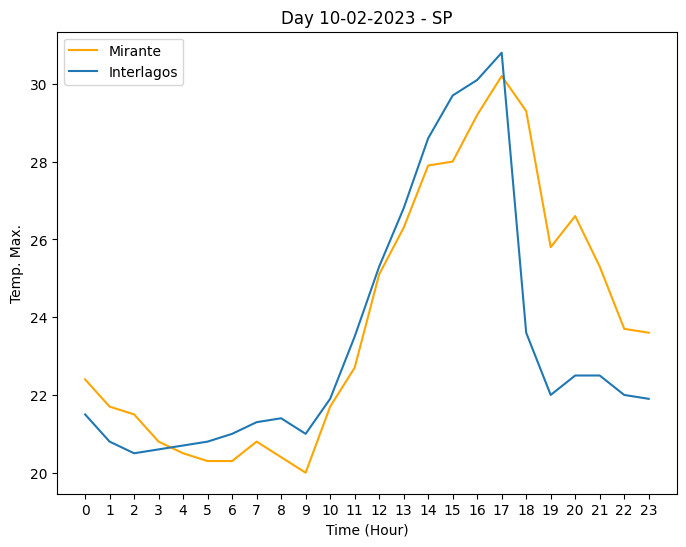

In [26]:
plt.figure(figsize=(8,6))
plt.plot(hora_modif, sp_mirante["Temp. Max. (C)"], label="Mirante", color='orange')
plt.plot(hora_modif, sp_interlagos["Temp. Max. (C)"], label="Interlagos")
plt.xlabel("Time (Hour)")
plt.ylabel("Temp. Max.")
plt.title("Day 10-02-2023 - SP")
plt.legend(loc= 'upper left')
plt.grid(False)
plt.show()

Simple graph of the Max Temperature of Porto Alegre

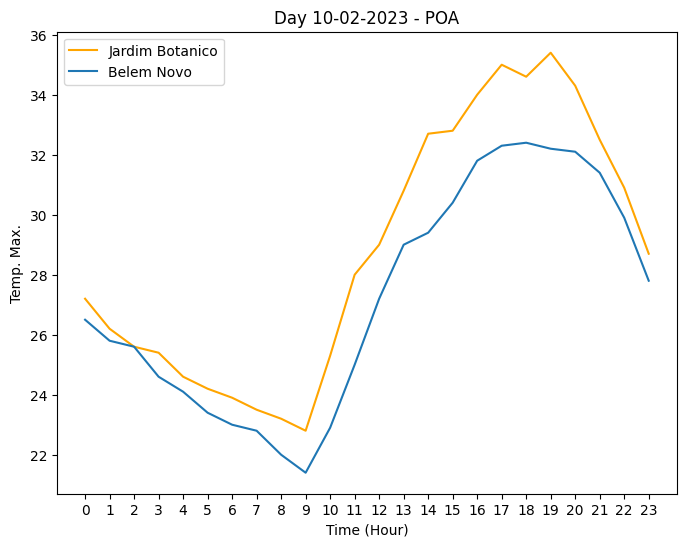

In [27]:
plt.figure(figsize=(8,6))
plt.plot(hora_modif, poa_JB["Temp. Max. (C)"], label="Jardim Botanico", color='orange')
plt.plot(hora_modif, poa_BN["Temp. Max. (C)"], label="Belem Novo")
plt.xlabel("Time (Hour)")
plt.ylabel("Temp. Max.")
plt.title("Day 10-02-2023 - POA")
plt.legend(loc= 'upper left')
plt.grid(False)
plt.show()

The above simple graphs have been merged into a single plot.

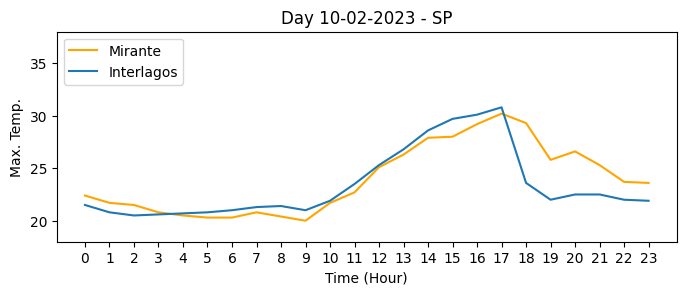

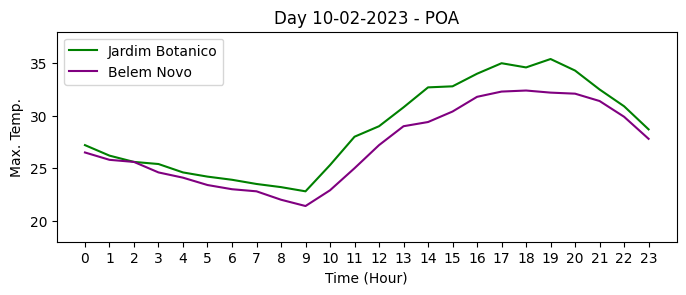

In [28]:
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
plt.plot(hora_modif, sp_mirante["Temp. Max. (C)"], label="Mirante", color='orange')
plt.plot(hora_modif, sp_interlagos["Temp. Max. (C)"], label="Interlagos")
plt.xlabel("Time (Hour)")
plt.ylabel("Max. Temp.")
plt.title("Day 10-02-2023 - SP")
plt.legend(loc= 'upper left')
plt.grid(False)
plt.ylim([18, 38])
plt.show()

plt.figure(figsize=(8,6))
plt.subplot(2, 1, 2)
plt.plot(hora_modif, poa_JB["Temp. Max. (C)"], label="Jardim Botanico", color='green')
plt.plot(hora_modif, poa_BN["Temp. Max. (C)"], label="Belem Novo", color='purple')
plt.xlabel("Time (Hour)")
plt.ylabel("Max. Temp.")
plt.title("Day 10-02-2023 - POA")
plt.legend(loc= 'upper left')
plt.grid(False)
plt.ylim([18, 38])

plt.show()

The graph below uses the maximum and minimum temperatures for each hour. 

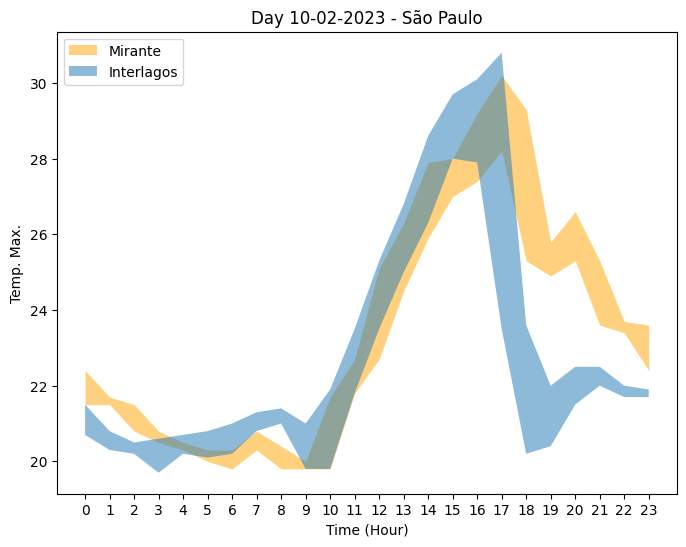

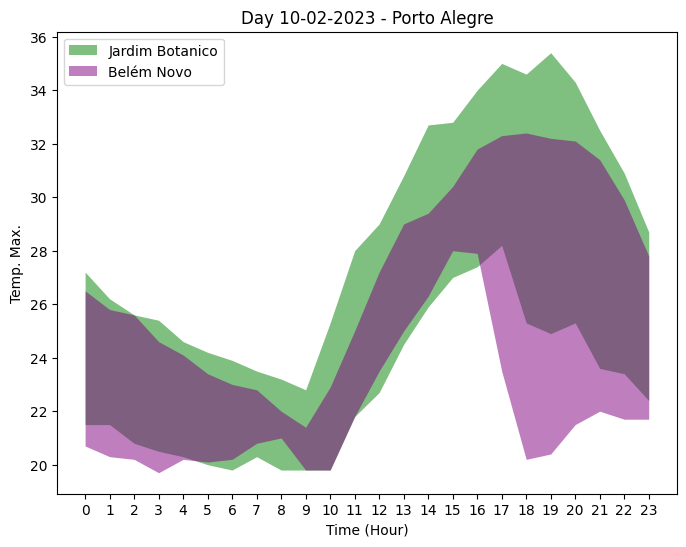

In [29]:
#plt.style.use('classic')
fig, ax = plt.subplots (figsize=(8,6))
ax.fill_between(hora_modif, sp_mirante["Temp. Max. (C)"], sp_mirante["Temp. Min. (C)"], alpha=.5, linewidth=0, color ='orange', label='Mirante')
ax.fill_between(hora_modif, sp_interlagos["Temp. Max. (C)"], sp_interlagos["Temp. Min. (C)"], alpha=.5, linewidth=0, label='Interlagos')
plt.xlabel("Time (Hour)")
plt.ylabel("Temp. Max.")
plt.title("Day 10-02-2023 - São Paulo")
plt.legend(loc= 'upper left')
plt.grid(False)
plt.show()

fig, poa = plt.subplots (figsize=(8,6))
poa.fill_between(hora_modif, poa_JB["Temp. Max. (C)"], sp_mirante["Temp. Min. (C)"], alpha=.5, linewidth=0, color ='green', label='Jardim Botanico')
poa.fill_between(hora_modif, poa_BN["Temp. Max. (C)"], sp_interlagos["Temp. Min. (C)"], alpha=.5, linewidth=0, label='Belém Novo', color='purple')
plt.xlabel("Time (Hour)")
plt.ylabel("Temp. Max.")
plt.title("Day 10-02-2023 - Porto Alegre")
plt.legend(loc= 'upper left')
plt.grid(False)
plt.show()

Using a dynamic graph, the Max temperature was plotted. Min. and Ins. of each station

In [30]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Day 10-02-2023 - SP - Mirante", "Day 10-02-2023 - SP - Interlagos"))

# Add traces for SP - Mirante
fig.add_trace(go.Scatter(x=hora_modif, y=sp_mirante["Temp. Max. (C)"], mode='lines', name="Temp. Max. - Mirantes", line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=hora_modif, y=sp_mirante["Temp. Min. (C)"], mode='lines', name="Temp. Min. - Interlagos", line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=hora_modif, y=sp_mirante["Temp. Ins. (C)"], mode='lines', name="Temp. Ins. - Interlagos", line=dict(color='grey')), row=1, col=1)

# Add traces for SP - Interlagos
fig.add_trace(go.Scatter(x=hora_modif, y=sp_interlagos["Temp. Max. (C)"], mode='lines', name="Temp. Max. - Mirantes", line=dict(color='magenta')), row=2, col=1)
fig.add_trace(go.Scatter(x=hora_modif, y=sp_interlagos["Temp. Min. (C)"], mode='lines', name="Temp. Min. - Interlagos", line=dict(color='orange')), row=2, col=1)
fig.add_trace(go.Scatter(x=hora_modif, y=sp_interlagos["Temp. Ins. (C)"], mode='lines', name="Temp. Ins. - Interlagos", line=dict(color='yellowgreen')), row=2, col=1)

# Update layout
fig.update_xaxes(title_text="Time (Hour)", row=1, col=1)
fig.update_xaxes(title_text="Time (Hour)", row=2, col=1)
fig.update_yaxes(title_text="Temperature", range=[18, 38], row=1, col=1)
fig.update_yaxes(title_text="Temperature", range=[18, 38], row=2, col=1)
fig.update_layout(height=800)

fig.show()

fig = make_subplots(rows=2, cols=1, subplot_titles=("Day 10-02-2023 - POA - Jardim Botanico", "Day 10-02-2023 - POA - Belem Novo"))

# Add traces for POA - Jardim Botanico
fig.add_trace(go.Scatter(x=hora_modif, y=poa_JB["Temp. Max. (C)"], mode='lines', name="Temp. Max. - Jardim Botanico", line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=hora_modif, y=poa_JB["Temp. Min. (C)"], mode='lines', name="Temp. Min. - Jardim Botanico", line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=hora_modif, y=poa_JB["Temp. Ins. (C)"], mode='lines', name="Temp. Ins. - Jardim Botanico", line=dict(color='grey')), row=1, col=1)

# Add traces for POA - Belem Novo
fig.add_trace(go.Scatter(x=hora_modif, y=poa_BN["Temp. Max. (C)"], mode='lines', name="Temp. Max. - Belem Novo", line=dict(color='magenta')), row=2, col=1)
fig.add_trace(go.Scatter(x=hora_modif, y=poa_BN["Temp. Min. (C)"], mode='lines', name="Temp. Min. - Belem Novo", line=dict(color='orange')), row=2, col=1)
fig.add_trace(go.Scatter(x=hora_modif, y=poa_BN["Temp. Ins. (C)"], mode='lines', name="Temp. Ins. - Belem Novo", line=dict(color='yellowgreen')), row=2, col=1)

# Update layout
fig.update_xaxes(title_text="Time (Hour)", row=1, col=1)
fig.update_xaxes(title_text="Time (Hour)", row=2, col=1)
fig.update_yaxes(title_text="Temperature", range=[18, 38], row=1, col=1)
fig.update_yaxes(title_text="Temperature", range=[18, 38], row=2, col=1)
fig.update_layout(height=800)

fig.show()

## MAPS

The same learning process of graph was made in maps visualization. We started with simple plots and progressed to interactive maps.

**Nome Estações**

Nome: SAO PAULO - MIRANTE
Codigo Estacao: A701
Latitude: -23.49638888
Longitude: -46.61999999

Nome: SAO PAULO - INTERLAGOS
Codigo Estacao: A771
Latitude: -23.724501
Longitude: -46.677501

Nome: PORTO ALEGRE - JARDIM BOTANICO
Codigo Estacao: A801
Latitude: -30.05361111
Longitude: -51.17472221

Nome: PORTO ALEGRE- BELEM NOVO
Codigo Estacao: B807
Latitude: -30.1861111
Longitude: -51.17805554

In [31]:
estaco = pd.DataFrame(
    {'City': ['Sao Paulo', 'Sao Paulo', 'Porto Alegre', 'Porto Alegre'],
    'Name': ['Mirante', 'Interlagos', 'Jardim Botanico', 'Belem Novo'],
    'Latitude': [-23.49638888, -23.724501, -30.05361111, -30.1861111],
    'Longitude': [-46.61999999, -46.677501, -51.17472221,  -51.17805554]})

points = gpd.GeoDataFrame(estaco, geometry=gpd.points_from_xy(estaco.Longitude, estaco.Latitude))
print(points.head())

points_sp = points[0:2]
print(points_sp)
points_poa = points[2:4]
print(points_poa)

           City             Name   Latitude  Longitude  \
0     Sao Paulo          Mirante -23.496389 -46.620000   
1     Sao Paulo       Interlagos -23.724501 -46.677501   
2  Porto Alegre  Jardim Botanico -30.053611 -51.174722   
3  Porto Alegre       Belem Novo -30.186111 -51.178056   

                      geometry  
0  POINT (-46.62000 -23.49639)  
1  POINT (-46.67750 -23.72450)  
2  POINT (-51.17472 -30.05361)  
3  POINT (-51.17806 -30.18611)  
        City        Name   Latitude  Longitude                     geometry
0  Sao Paulo     Mirante -23.496389 -46.620000  POINT (-46.62000 -23.49639)
1  Sao Paulo  Interlagos -23.724501 -46.677501  POINT (-46.67750 -23.72450)
           City             Name   Latitude  Longitude  \
2  Porto Alegre  Jardim Botanico -30.053611 -51.174722   
3  Porto Alegre       Belem Novo -30.186111 -51.178056   

                      geometry  
2  POINT (-51.17472 -30.05361)  
3  POINT (-51.17806 -30.18611)  


SIMPLE MAP PLOT 

Simple map plot. Zooming in on the state of São Paulo, city and point of weather stations

<AxesSubplot: >

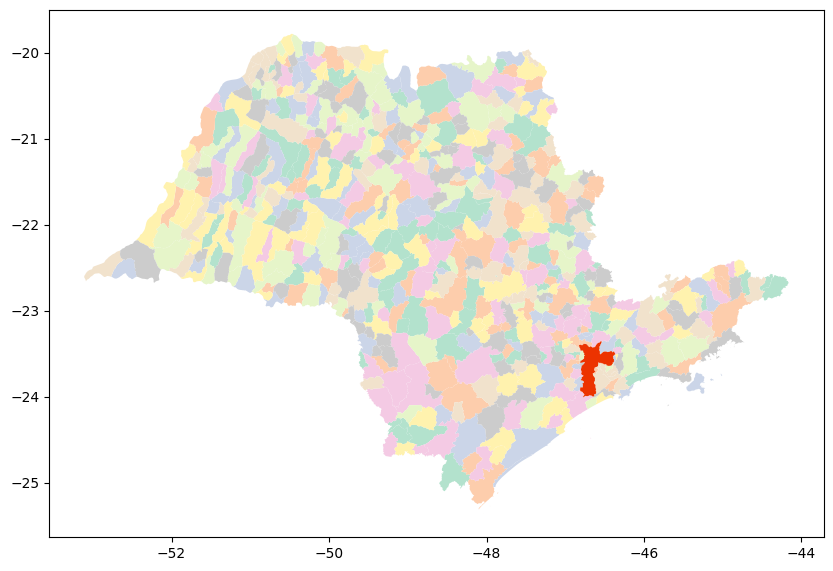

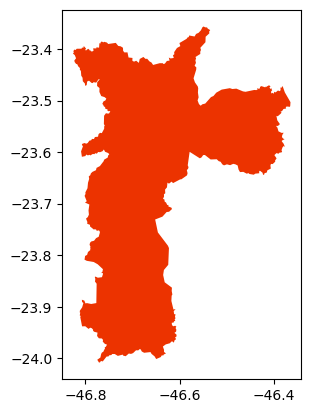

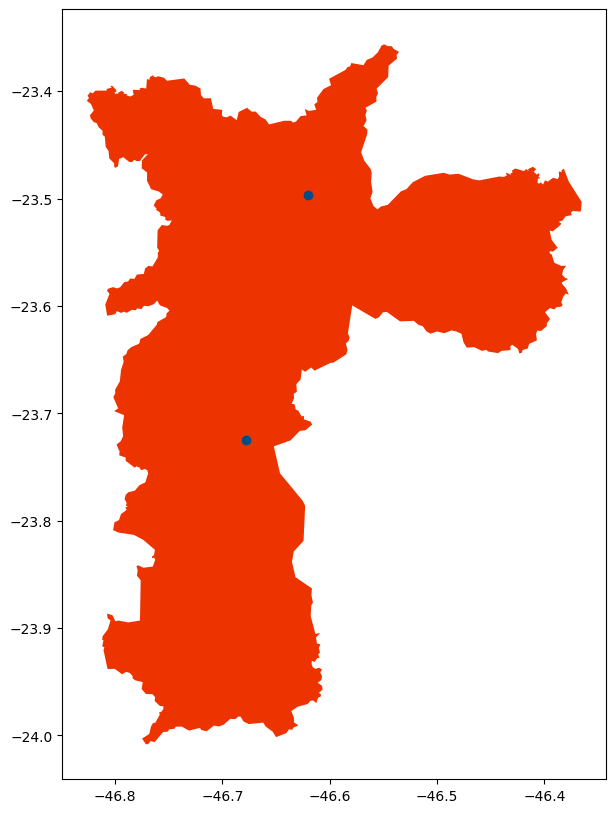

In [32]:
# Filter for status of São Paulo
muni = geobr.read_municipality(code_muni='SP', year=2020)

# Filtering to base for São Paulo
gdf_muni = muni[muni.name_muni == 'São Paulo']

# Plot state SP and city São Paulo
fig, ax = plt.subplots(figsize=(10,10))
base = muni.plot(ax=ax, cmap='Pastel2')
gdf_muni.plot(ax=base, legend=True, color='#EC3300')

# Plot city São Paulo
gdf_muni.plot(color='#EC3300')

# Plot neighbourhoods Mirante and Interlogo
fig, ax = plt.subplots(figsize=(10,10))
base = gdf_muni.plot(ax=ax, color='#EC3300')
points_sp.plot(ax=base, legend=True, color='#004D8A', label='station')

The same process was made for Porto Alegre

<AxesSubplot: >

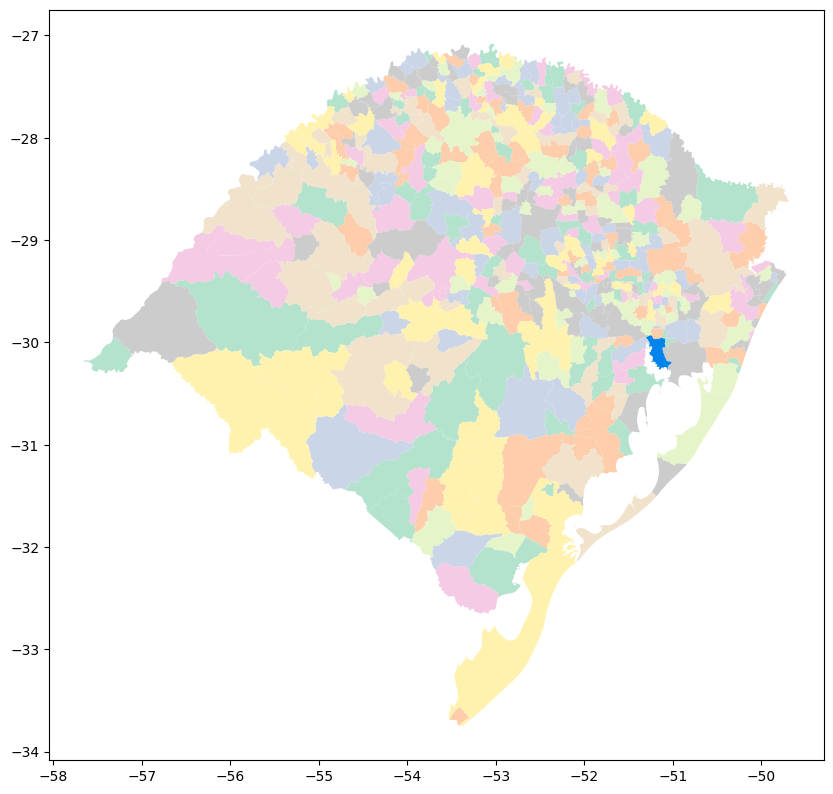

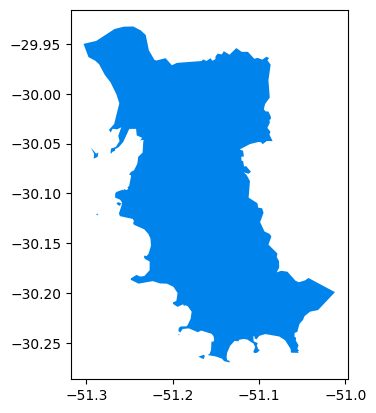

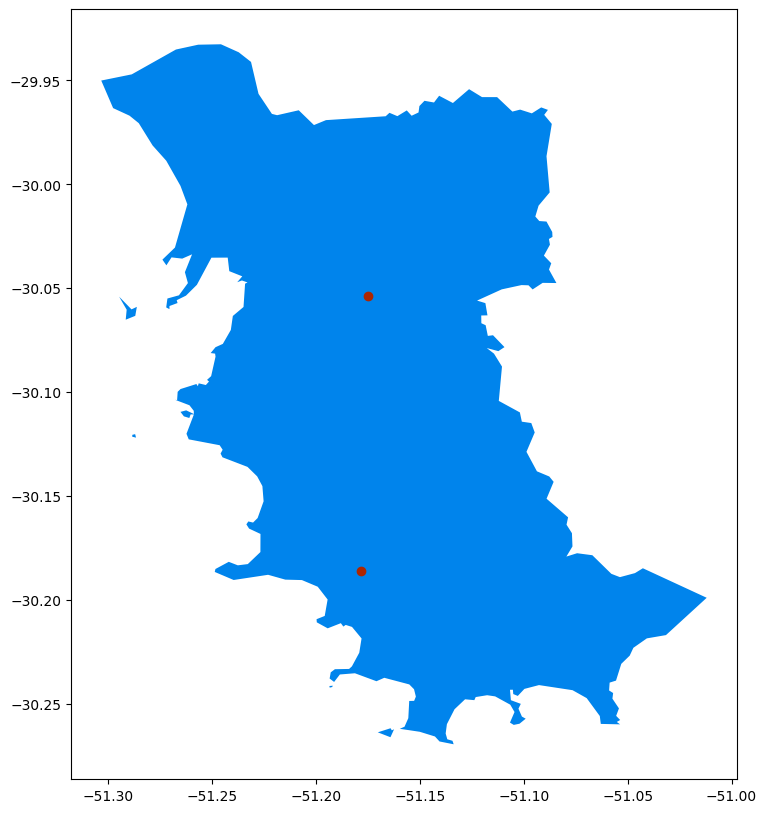

In [33]:
# Filter for status of Rio Grande do Sul
muni = geobr.read_municipality(code_muni='RS', year=2020)

# Filtering to base for Porto Alegre
gdf_muni = muni[muni.name_muni == 'Porto Alegre']

# Plot state RS and city Porto Alegre
fig, ax = plt.subplots(figsize=(10,10))
base = muni.plot(ax=ax, cmap='Pastel2')
gdf_muni.plot(ax=base, legend=True, color='#0084EC')

# Plot city Porto Alegre
gdf_muni.plot(color='#0084EC')

# Plot neighbourhoods Jardim Botanico and Belem Novo
fig, ax = plt.subplots(figsize=(10,10))
base = gdf_muni.plot(ax=ax, color='#0084EC')
points_poa.plot(ax=base, legend=True, color='#AD2601')

Interactive map - São Paulo

Mirante has a climate that can be classified as a tropical savannah climate, while Interlagos is located between two large reservoirs, Guarapiranga and Billings.

In [34]:
# Define the location and zoom level of the map
#Folium only operate in the jupterlab
m = folium.Map(location=[-23.5475, -46.63611], zoom_start=12)

# Define a tooltip message to display when hovering over the markers
tooltip = "Click me!"

# Create a marker for the station and add it to the map
folium.Marker([estaco['Latitude'][0], estaco['Longitude'][0]], popup="<b>Mirante</b>", tooltip=tooltip).add_to(m)
folium.Marker([estaco['Latitude'][1], estaco['Longitude'][1]], popup="<b>Interlogos</b>", tooltip=tooltip).add_to(m)

#Display
m

Interactive Map - Porto Alegre

The Jardim Botanico weather station is located in a more urbanized area and close to the downtown area, while the Belém Novo station is located in a less urbanized area with rural characteristics and far from the downtown area.

In [35]:
#STATION MAPS IN AN INTERACTIVE WAY
#Folium only operate in the jupterlab
m = folium.Map(location=[-30.03283, -51.23019], zoom_start=12)

tooltip = "Click me!"

folium.Marker([estaco['Latitude'][2], estaco['Longitude'][2]], popup="<b>Jardim Botanico</b>", tooltip=tooltip).add_to(m)
folium.Marker([estaco['Latitude'][3], estaco['Longitude'][3]], popup="<b>Belem Novo</b>", tooltip=tooltip).add_to(m)

#Display
m

# Closing thoughts

It was possible to percieve that the temperature in each station has a different behaviour, despite being relatively close geographically.

In Porto Alegre it is possible to say that the heat island phenomenon is clear, with the temperature curves being similar, but with the Jardim Botanico indexes(more urbanized) always superior to the Belém Novo ones.

In São Paulo the phenomenon is not seen so clearly. This can occur because the stations are in urbanized and conurbated areas. Curious to see how the temperature in Interlagos drops after 4pm, this may happen because the region, which is less urbanized than Mirante, retains the heat for less time.